<a href="https://colab.research.google.com/github/Nayanapoojary/Nayanapoojary/blob/main/Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install tensorflow keras

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense,AvgPool2D,MaxPool2D
from keras.optimizers import Adam, SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import regularizers # Corrected import
from tensorflow.keras.callbacks import EarlyStopping


import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import matplotlib.image as mpimg

import plotly.offline as py
import plotly.express as px
import prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import zipfile
os.makedirs("/root/.kaggle",exist_ok=True)

In [ ]:
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [ ]:
!unzip chest-xray-pneumonia.zip -d chest_xray_data

unzip:  cannot find or open chest-xray-pneumonia.zip, chest-xray-pneumonia.zip.zip or chest-xray-pneumonia.zip.ZIP.


In [ ]:
data='/content/chest_xray_data/chest_xray'

In [ ]:
os.listdir(data)

FileNotFoundError: [Errno 2] No such file or directory: '/content/chest_xray_data/chest_xray'

In [ ]:
!rm -r /content/chest_xray_data/chest_xray/__MACOSX
!rm -r /content/chest_xray_data/chest_xray/chest_xray/test
!rm -r /content/chest_xray_data/chest_xray/chest_xray/train
!rm -r /content/chest_xray_data/chest_xray/chest_xray/val
!rm -r /content/chest_xray_data/chest_xray/chest_xray

In [ ]:
data_dir="/content/chest_xray_data/chest_xray"

train_dataset=tf.keras.utils.image_dataset_from_directory(data_dir,
                                                    image_size=(150,150),batch_size=16)

Found 5856 files belonging to 3 classes.


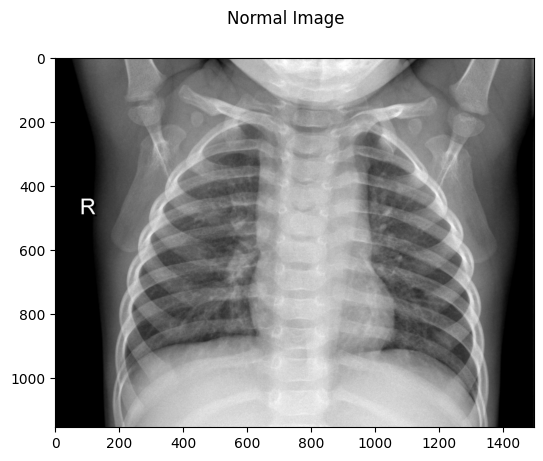

In [ ]:
normal_images=[]
for img_path in glob.glob(data+'/train/NORMAL/*'):
  normal_images.append(mpimg.imread(img_path))
fig=plt.figure()
fig.suptitle('Normal Image')
plt.imshow(normal_images[0],cmap='gray')

In [ ]:
Image_Width=150
Image_Height=150
Channels=3
INPUT_SHAPE=(Image_Width,Image_Height,Channels)
NB_CLASSES=2
EPOCHS=30
BATCH_SIZE=6

In [ ]:
model = Sequential()

# First Convolutional Block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=INPUT_SHAPE,
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Second Convolutional Block
model.add(Conv2D(64, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

# Third Convolutional Block
model.add(Conv2D(128, (3, 3), activation='relu',
                 kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
# Optional: model.add(Dropout(0.25))

model.add(Flatten())

# Fully Connected Layers
model.add(Dense(128, activation='relu',
                kernel_regularizer=regularizers.l2(0.001))) # Added L2 regularization
model.add(Dropout(0.7))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,829,377 (18.42 MB)

 Trainable params: 4,828,929 (18.42 MB)

 Non-trainable params: 448 (1.75 KB)

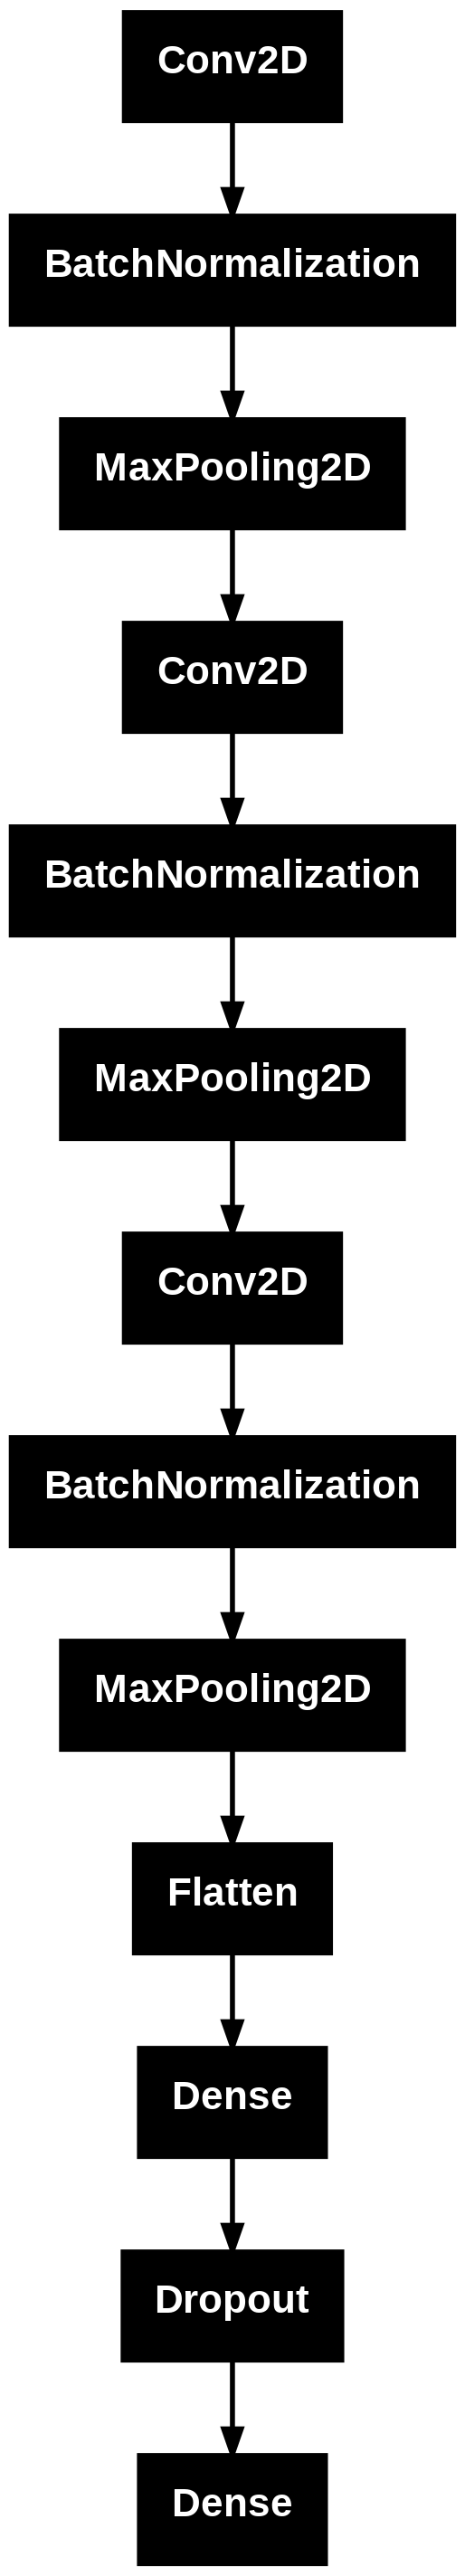

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png')

In [ ]:
train_dir = "/content/chest_xray_data/chest_xray/train"
val_dir = "/content/chest_xray_data/chest_xray/val"
test_dir = "/content/chest_xray_data/chest_xray/test"

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'  # use 'categorical' only if you want one-hot vectors
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=16,
    label_mode='binary'
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [ ]:
train_image_count = 5216
val_image_count = 16

steps_per_epoch = train_image_count // BATCH_SIZE
validation_steps = val_image_count // BATCH_SIZE

In [ ]:
early_stoping=EarlyStopping(monitor='val_loss',
                            patience=10,
                            restore_best_weights=True,
                            verbose=1)

In [ ]:
history = model.fit(
    train_dataset,
    steps_per_epoch=steps_per_epoch,
    epochs=EPOCHS,
    validation_data=val_dataset,
    validation_steps=validation_steps

)

Epoch 1/30
326/869 ━━━━━━━━━━━━━━━━━━━━ 47s 88ms/step - accuracy: 0.8555 - loss: 2.4105

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning:

Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.



869/869 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8756 - loss: 1.7787 - val_accuracy: 0.8750 - val_loss: 0.9797
Epoch 2/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9213 - loss: 0.7104 - val_accuracy: 0.8125 - val_loss: 0.7392
Epoch 3/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - accuracy: 0.9270 - loss: 0.6391 - val_accuracy: 0.8125 - val_loss: 0.7334
Epoch 4/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9312 - loss: 0.5390 - val_accuracy: 0.8125 - val_loss: 0.7377
Epoch 5/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 30s 34ms/step - accuracy: 0.9276 - loss: 0.6645 - val_accuracy: 0.5625 - val_loss: 13.8486
Epoch 6/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9395 - loss: 0.6579 - val_accuracy: 0.9375 - val_loss: 0.5556
Epoch 7/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9421 - loss: 0.6109 - val_accuracy: 0.7500 - val_loss: 0.6937
Epoch 8/30
869/869 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.9484 - loss: 0.5165 - val_accura

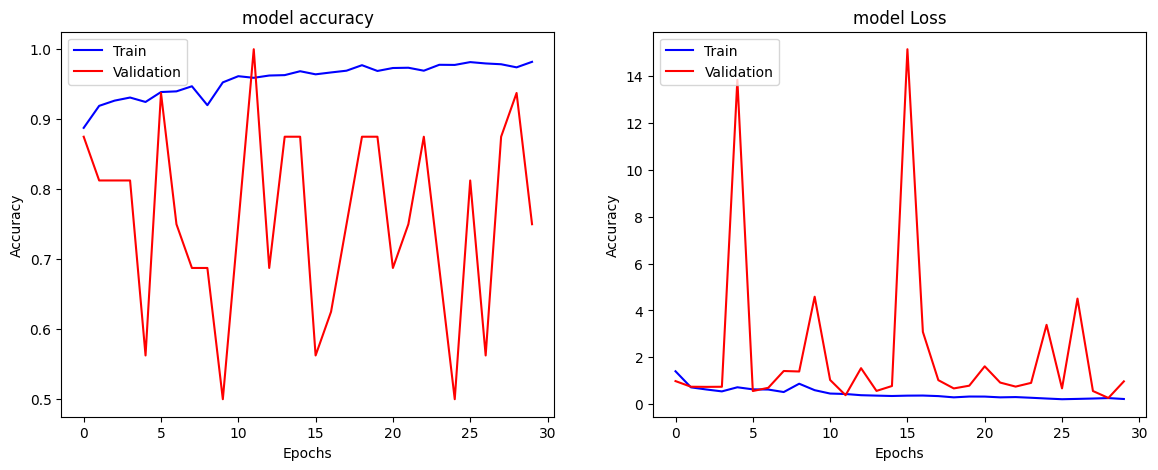

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(14,5))
ax[0].plot(history.history['accuracy'],color='b',label='Training Loss')
ax[0].plot(history.history['val_accuracy'],color='r',label='Validation Loss')
ax[0].set_title('model accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train','Validation'],loc='upper left')

ax[1].plot(history.history['loss'],color='b',label='Training Loss')
ax[1].plot(history.history['val_loss'],color='r',label='Validation Loss')
ax[1].set_title('model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['Train','Validation'],loc='upper left')
plt.show()


In [ ]:
print("Training Accuracy",history.history['accuracy'][-1])
print("Validation Accuracy",history.history['val_accuracy'][-1])

Training Accuracy 0.9819785356521606
Validation Accuracy 0.75


In [ ]:
class_names=val_dataset.class_names
print(class_names)

['NORMAL', 'PNEUMONIA']


In [ ]:
true_lables=[]
for images,lables in val_dataset:
  true_lables.extend(lables.numpy())
true_lables=np.array(true_lables)

In [ ]:
predictions=model.predict(val_dataset)
predicted_classes=(predictions>0.5).astype("int32").flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step


In [ ]:
predicted_labels=[class_names[i] for i in predicted_classes]
true_labels_names=[class_names[int(i)] for i in true_lables]

/tmp/ipython-input-1689207675.py:2: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
print(predicted_labels[:10])
print(true_labels_names[:10])

['NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA']
['PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA', 'PNEUMONIA']


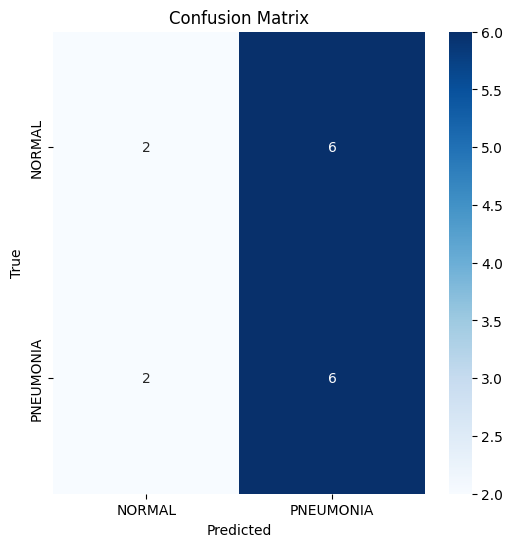

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6,6))
cf=confusion_matrix(true_labels_names,predicted_labels)
sns.heatmap(cf,
            cmap ="Blues",
            linecolor='black',
            annot=True,
            fmt='',
            xticklabels=class_names,
            yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
pred_class=np.array(predicted_labels)

In [ ]:
lable_map={'NORMAL':0, 'PNEUMONIA':1}

pred_class=np.array([lable_map[label] for label in predicted_labels])
true_class=np.array([int(label) for label in true_lables]) # Iterate through flattened array

/tmp/ipython-input-1885829903.py:4: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [ ]:
correct=np.nonzero(pred_class==true_class)[0]
correct=np.nonzero(pred_class==true_class)[0]
accuracy=len(correct)/len(true_class)
print(f"Accuracy from comparison:{accuracy:.4f}")

Accuracy from comparison:0.5000


In [ ]:
val_images=[]
val_labels_for_plot=[] # Create a separate list for labels

for img, lables in val_dataset.unbatch().take(100):
  val_images.append(img.numpy())
  val_labels_for_plot.append(lables.numpy()) # Append labels to the new list

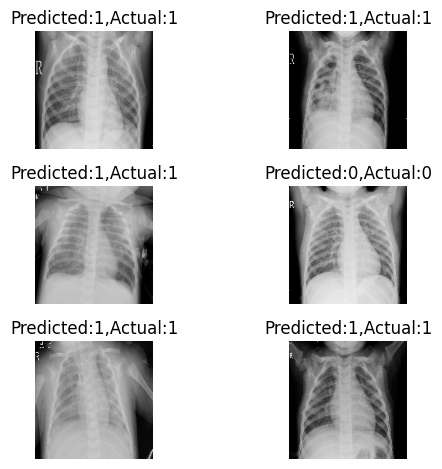

In [ ]:
i=0
for c in correct[:6]:
  plt.subplot(3,2,i+1)
  plt.imshow(val_images[c].astype("uint8")) # Corrected variable name
  plt.title("Predicted:{},Actual:{}".format(pred_class[c],true_class[c]))
  plt.axis('off')
  i += 1 # Increment i

plt.tight_layout()
plt.show()

In [ ]:
model.save('training.h5')

To download datasets from Kaggle, you need to provide your Kaggle API credentials.

1. Go to your Kaggle account settings.
2. Under the "API" section, click on "Create New API Token". This will download a `kaggle.json` file.
3. In Colab, click on the "🔑" icon in the left sidebar to open the Secrets tab.
4. Click on "Add new secret".
5. For the "Name" field, enter `KAGGLE_JSON`.
6. For the "Value" field, open the `kaggle.json` file you downloaded and paste its content here.
7. Make sure the "Notebook access" toggle is enabled for this secret.

After adding the secret, the following code will create the necessary directory and copy the `kaggle.json` file there.

In [ ]:
import os
from google.colab import userdata

# Create the .kaggle directory if it doesn't exist
os.makedirs("/root/.kaggle", exist_ok=True)

# Get the Kaggle API key from Colab secrets
kaggle_json = userdata.get('KAGGLE_JSON')

# Write the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(kaggle_json)

# Set permissions for the kaggle.json file
os.chmod("/root/.kaggle/kaggle.json", 600)

Now you can try downloading the dataset again.

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Now I will unzip the downloaded dataset.

In [ ]:
!unzip -q chest-xray-pneumonia.zip -d chest_xray_data

Now that the dataset is downloaded and unzipped, let's verify the directory structure and list the contents.

In [ ]:
import os
data = '/content/chest_xray_data/chest_xray'
os.listdir(data)